In [2]:
# 好的學習與實作方式：
#     程式也是學習也是創業最重要的就是主動去解決所有預想『可能』會出現的問題

In [3]:
import pandas as pd
train = pd.read_csv("/Users/juhn/Desktop/stady_file/資料整理/鐵達尼號/train.csv",encoding="utf-8")
test = pd.read_csv("/Users/juhn/Desktop/stady_file/資料整理/鐵達尼號/test.csv",encoding="utf-8")

In [4]:
# serach column None count train and test

train.isna().sum()
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
# use median add to None but type is number

train_median = train.median(numeric_only=True)
train = train.fillna(train_median)

test_median = test.median(numeric_only=True)
test = test.fillna(test_median)

In [6]:
# use count max add to number (String)
train_most = train["Embarked"].value_counts().idxmax()
train["Embarked"] = train["Embarked"].fillna(train_most)

test_most = test["Embarked"].value_counts().idxmax()
test["Embarked"] = test["Embarked"].fillna(test_most)


In [7]:
# Trash Out

train = train.drop(["Cabin","Ticket"],axis=1)


test = test.drop(["Cabin","Ticket"],axis=1)

In [8]:
# One Hot Encoder Embarked
train_Encoder = pd.get_dummies(train["Embarked"]).astype("int64")
train = pd.concat([train,train_Encoder],axis=1)
train = train.drop("Embarked",axis=1)

test_Encoder = pd.get_dummies(test["Embarked"]).astype("int64")
test = pd.concat([test,test_Encoder],axis=1)
test = test.drop("Embarked",axis=1)

In [9]:
# One Hot Encoder to Sex
train_Encoder_Sex = pd.get_dummies(train["Sex"]).astype("int64")
train = pd.concat([train,train_Encoder_Sex],axis=1)
train = train.drop("Sex",axis=1)

test_Encoder_Sex = pd.get_dummies(test["Sex"]).astype("int64")
test = pd.concat([test,test_Encoder_Sex],axis=1)
test = test.drop("Sex",axis=1)

train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,13.0000,0,0,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,30.0000,0,0,1,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,23.4500,0,0,1,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,30.0000,1,0,0,0,1


In [10]:
# Name to Encoder

def name_flow(s):
    most = s.split(",")[-1].split(".")[0]
    most = most.replace(" ","")
    return most
name = train["Name"].apply(name_flow)

In [11]:
pd.crosstab(name,train["Survived"]).T

Name,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,theCountess
Survived,,,,,,,,,,,,,,,,,
0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [12]:
def clean_name(s):
    d = {
        "Master":"Master",
        "Miss":"Miss",
        "Mr":"Mr",
        "Mrs":"Mrs"
    }
    return d.get(s)

train["Name"] = train["Name"].apply(name_flow).apply(clean_name)
most = train["Name"].value_counts().idxmax()
train["Name"] = train["Name"].fillna(most)
train_Encoder_Name = pd.get_dummies(train["Name"]).astype("int64")
train = pd.concat([train,train_Encoder_Name],axis=1)
train = train.drop(["Name","PassengerId"],axis=1)


test["Name"] = test["Name"].apply(name_flow).apply(clean_name)
most = test["Name"].value_counts().idxmax()
test["Name"] = test["Name"].fillna(most)
test_Encoder_Name = pd.get_dummies(test["Name"]).astype("int64")
test = pd.concat([test,test_Encoder_Name],axis=1)
test = test.drop("Name",axis=1)
test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,Master,Miss,Mr,Mrs
0,892,3,34.5,0,0,7.8292,0,1,0,0,1,0,0,1,0
1,893,3,47.0,1,0,7.0000,0,0,1,1,0,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,0,1,0,0,1,0
3,895,3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1,0
4,896,3,22.0,1,1,12.2875,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,27.0,0,0,8.0500,0,0,1,0,1,0,0,1,0
414,1306,1,39.0,0,0,108.9000,1,0,0,1,0,0,0,1,0
415,1307,3,38.5,0,0,7.2500,0,0,1,0,1,0,0,1,0
416,1308,3,27.0,0,0,8.0500,0,0,1,0,1,0,0,1,0


In [13]:
#chack all value type is int of float
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   C         891 non-null    int64  
 7   Q         891 non-null    int64  
 8   S         891 non-null    int64  
 9   female    891 non-null    int64  
 10  male      891 non-null    int64  
 11  Master    891 non-null    int64  
 12  Miss      891 non-null    int64  
 13  Mr        891 non-null    int64  
 14  Mrs       891 non-null    int64  
dtypes: float64(2), int64(13)
memory usage: 104.5 KB


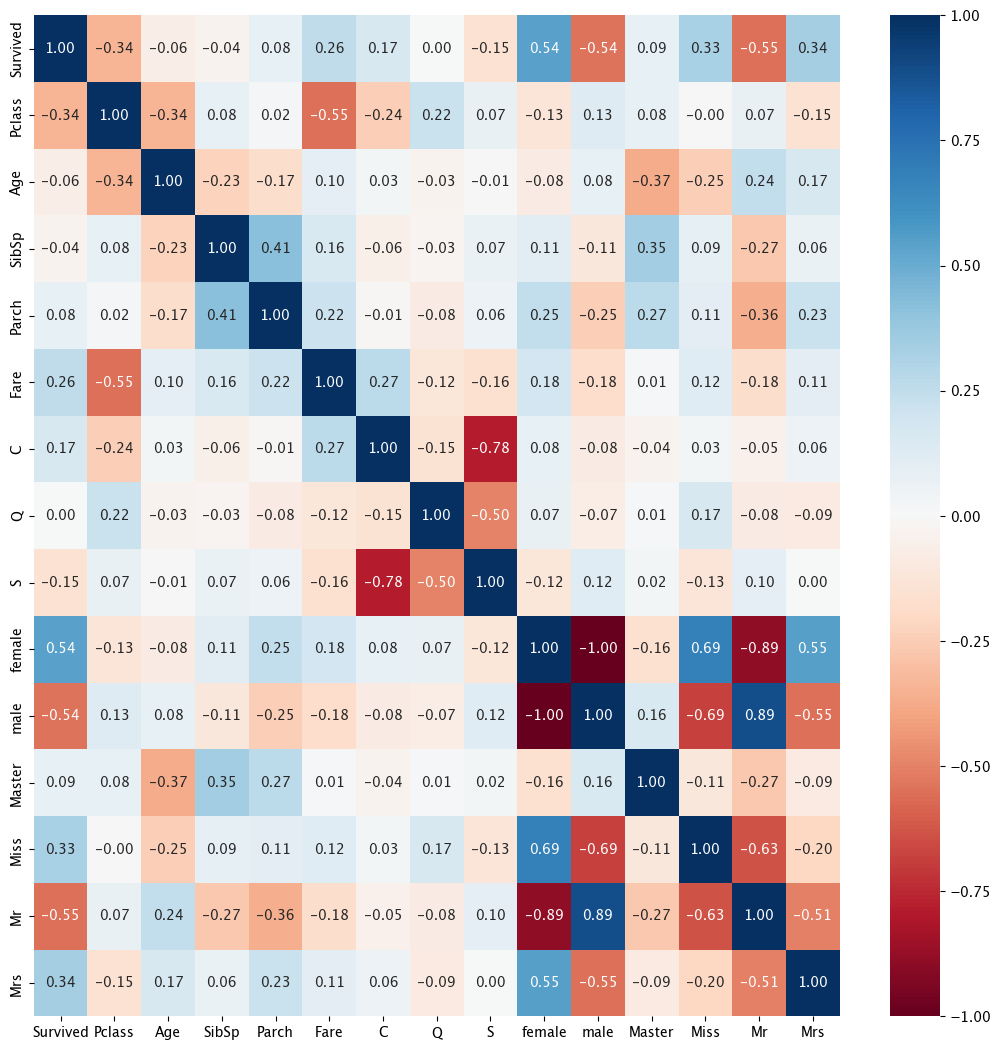

In [14]:
# heatmap

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13,13))
sns.heatmap(data=train.corr(),cmap="RdBu",annot=True,fmt=".2f")
plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

x = train.drop("Survived",axis=1)
y = train["Survived"]
clf = RandomForestClassifier(max_depth=10,n_estimators=20)
np.average(cross_val_score(clf,x,y))

np.float64(0.8305191136777352)

In [16]:
# 超參數 優化
from sklearn.model_selection import GridSearchCV

g = {
    "max_depth":list(range(1,38)),
    "n_estimators":list(range(1,41))
}
clf = RandomForestClassifier()
s = GridSearchCV(clf,g)
s.fit(x,y)
print(s.best_score_)
print(s.best_estimator_)

0.8395518172117254
RandomForestClassifier(max_depth=9, n_estimators=9)


In [17]:
test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,Master,Miss,Mr,Mrs
0,892,3,34.5,0,0,7.8292,0,1,0,0,1,0,0,1,0
1,893,3,47.0,1,0,7.0000,0,0,1,1,0,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,0,1,0,0,1,0
3,895,3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1,0
4,896,3,22.0,1,1,12.2875,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,27.0,0,0,8.0500,0,0,1,0,1,0,0,1,0
414,1306,1,39.0,0,0,108.9000,1,0,0,1,0,0,0,1,0
415,1307,3,38.5,0,0,7.2500,0,0,1,0,1,0,0,1,0
416,1308,3,27.0,0,0,8.0500,0,0,1,0,1,0,0,1,0


In [ ]:
testx = test.drop("PassengerId",axis=1)
id = test["PassengerId"]
ans = pd.DataFrame()
survived = s.predict(testx)
sorce = s.best_score_
print(f"{sorce:.2f}%")
ans["PassengerId"] = id
ans["survived"] = survived
ans.to_csv("Tans.csv",index=False)

0.84%
